In [1]:
import sys, os
import warnings
os.environ['XUVTOP'] = '/home/welterde/mess/2022/11/chianti_db'
import pyneb
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
import pyneb as pn
O1 = pn.Atom('O', 1)

In [3]:
O1.printIonic(tem=10000., den=1e3, printA=True, printPop=True, printCrit=True)

elem = O
spec = 1
temperature = 10000.0 K
density = 1000.0 cm-3

Level   Populations  Critical densities
Level 1:  9.530E-01  0.000E+00
Level 2:  2.393E-02  2.155E+04
Level 3:  2.306E-02  3.186E+03
Level 4:  3.658E-05  1.531E+06
Level 5:  3.186E-09  9.539E+07

8.910E-05   
     63.17m 
    (2-->1) 
  6.703E-23 

1.340E-10   1.750E-05   
     44.05m     145.50m 
    (3-->1)     (3-->2) 
  1.393E-28   5.509E-24 

5.651E-03   1.823E-03   8.600E-07   
   6300.30A    6363.77A    6391.73A 
    (4-->1)     (4-->2)     (4-->3) 
  6.515E-22   2.081E-22   9.773E-26 

2.420E-04   7.540E-02   0.000E+00   1.260E+00   
   2958.37A    2972.29A    2978.37A    5577.34A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  5.176E-27   1.605E-24   0.000E+00   1.429E-23 

# H-beta volume emissivity:
1.237E-25 N(H+) * N(e-)  (erg/s)


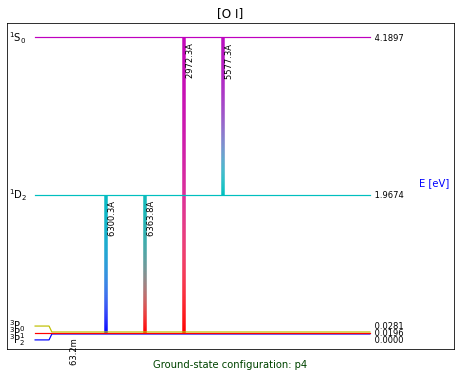

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
O1.plotGrotrian(tem=6000, den=1e8, thresh_int=1e-3, unit = 'eV', ax=ax)


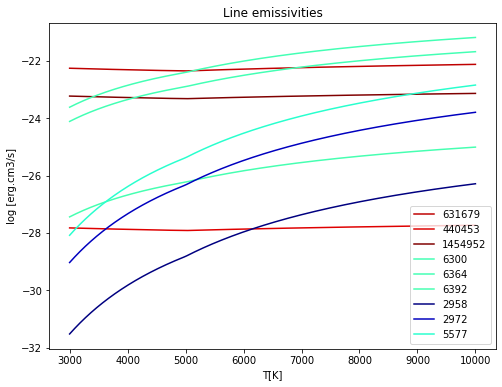

In [5]:
f, ax = plt.subplots(figsize=(8, 6))
O1.plotEmiss(tem_min=3000, tem_max=1e4, ionic_abund=1.0, den=1e1, style='-',
             legend_loc=4, temLog=False, plot_total=False, plot_only_total=False, 
             legend=True, total_color='black', total_label='TOTAL', ax=ax)

In [6]:
O1R = pn.RecAtom('O', 1)

In [7]:
O1R.getEmissivity([1e4, 1.8e4], [1e4, 1e2], lev_i = 4, lev_j = 2)

warng Atom O1: Wrong label 4_2


In [8]:
pyneb.atomicData.getAllAvailableFiles('O1')

['* o_i_atom_WFD96.dat',
 '* o_i_coll_BK95.dat',
 '* o_i_rec_P91.func',
 'o_i_atom.chianti',
 'o_i_coll.chianti',
 'o_i_coll_AKD07.dat',
 'o_i_coll_BBT98.dat',
 'o_i_coll_LR77.dat',
 'o_i_coll_TH85.dat']

In [9]:
pyneb.atomicData.getAllAtoms(coll=False, rec=True)

['H1',
 'He1',
 'He2',
 'C1',
 'C2',
 'C3',
 'C4',
 'N1',
 'N2',
 'N3',
 'N4',
 'Ne2',
 'O1',
 'O2',
 'O3',
 'O4',
 'O5',
 'N5',
 'O6']

In [10]:
pyneb.atomicData.getDataFile('O1', 'rec')

'o_i_rec_P91.func'

In [11]:
pn.RecAtom('O', 2).labels

('1541.26',
 '6555.84',
 '6488.38',
 '6425.90',
 '6559.06',
 '6555.99',
 '6550.48',
 '6491.09',
 '6426.83',
 '6559.17',
 '6556.10',
 '6550.60',
 '6370.32',
 '6559.24',
 '6551.76',
 '6550.66',
 '6427.00',
 '6369.81',
 '6458.87',
 '6283.70',
 '6066.47',
 '5885.06',
 '2707.66',
 '2602.26',
 '2591.27',
 '2588.42',
 '2588.00',
 '2569.05',
 '2502.50',
 '2497.63',
 '6555.64',
 '6539.33',
 '6537.56',
 '6423.77',
 '6554.60',
 '6539.38',
 '6424.13',
 '6284.87',
 '6113.32',
 '5956.79',
 '2602.46',
 '2588.62',
 '2509.12',
 '2502.69',
 '6461.89',
 '6439.14',
 '6173.01',
 '6161.15',
 '6146.98',
 '6069.14',
 '6063.60',
 '2708.19',
 '2704.40',
 '2635.09',
 '2588.48',
 '2588.38',
 '2574.38',
 '2498.09',
 '2494.72',
 '6147.00',
 '6114.93',
 '6069.15',
 '5919.58',
 '2708.20',
 '2602.75',
 '2591.76',
 '2588.91',
 '2588.49',
 '2509.39',
 '2502.96',
 '2498.09a',
 '6495.80',
 '6498.42',
 '6543.98',
 '6471.44',
 '6471.42',
 '6545.75',
 '6471.42a',
 '6430.27',
 '6446.06',
 '6167.49',
 '6153.29',
 '2709.42',
 '

In [12]:
pyneb.utils.manage_atomic_data.getLevelsNIST('O2')

array([('2s2.2p3', '4S*', 1.5,      0.   , 'L11267'),
       ('2s2.2p3', '2D*', 2.5,  26810.55 , 'L11267'),
       ('2s2.2p3', '2D*', 1.5,  26830.57 , 'L11267'),
       ('2s2.2p3', '2P*', 1.5,  40468.01 , 'L11267'),
       ('2s2.2p3', '2P*', 0.5,  40470.   , 'L11267'),
       ('2s.2p4', '4P', 2.5, 119837.21 , 'L11267'),
       ('2s.2p4', '4P', 1.5, 120000.43 , 'L11267'),
       ('2s.2p4', '4P', 0.5, 120082.86 , 'L11267'),
       ('2s.2p4', '2D', 2.5, 165988.46 , 'L11267'),
       ('2s.2p4', '2D', 1.5, 165996.5  , 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 0.5, 185235.281, 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 1.5, 185340.577, 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 2.5, 185499.124, 'L11267'),
       ('2s2.2p2.(3P).3s', '2P', 0.5, 188888.543, 'L11267'),
       ('2s2.2p2.(3P).3s', '2P', 1.5, 189068.514, 'L11267'),
       ('2s.2p4', '2S', 0.5, 195710.47 , 'L11267'),
       ('2s2.2p2.(3P).3p', '2S*', 0.5, 203942.288, 'L11267'),
       ('2s2.2p2.(3P).3p', '4D*', 0.5, 206730.762, 

In [13]:
O1.lineList

array([ 631678.86536047,  440452.80178832, 1454951.91018998,
          6300.30103871,    6363.77334777,    6391.73025148,
          2958.36502823,    2972.28611783,    2978.37093771,
          5577.33674903])

In [14]:
O2 = pyneb.Atom('O', 2)

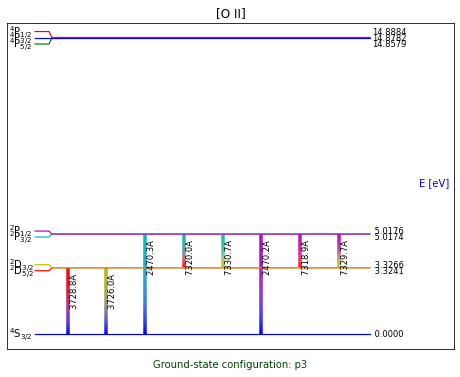

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
O2.plotGrotrian(tem=6000, den=1e4, thresh_int=1e-3, unit = 'eV', ax=ax)


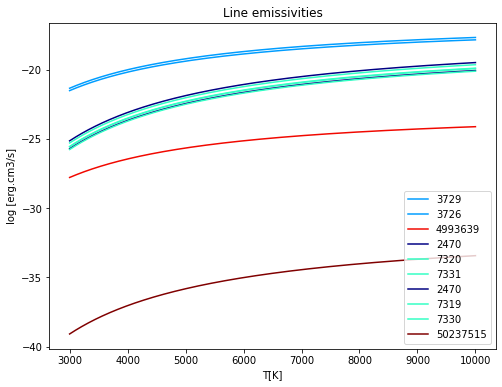

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
O2.plotEmiss(tem_min=3000, tem_max=1e4, ionic_abund=1.0e3, den=1e1, style='-',
             legend_loc=4, temLog=False, plot_total=False, plot_only_total=False, 
             legend=True, total_color='black', total_label='TOTAL', ax=ax)

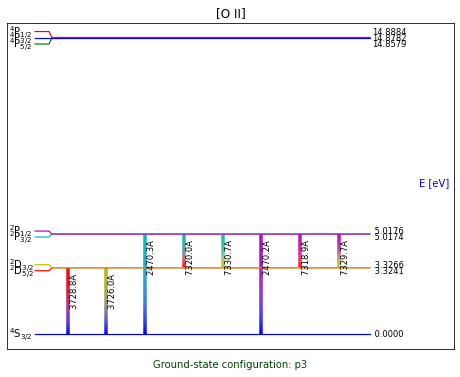

In [43]:
#pyneb.atomicData.addAllChianti()
pyneb.atomicData.setDataFile('o_i_atom.chianti')
pyneb.atomicData.setDataFile('o_i_coll.chianti')
O1_ch = pyneb.Atom('O',2)
f, ax = plt.subplots(figsize=(8, 6))
O1_ch.plotGrotrian(tem=8000, den=1e4, thresh_int=1e-3, unit = 'eV', ax=ax)


In [45]:
O1R = pyneb.RecAtom('O', 1)

In [49]:
O1R.recFitsFile

'o_i_rec_P91.func'

In [32]:
pyneb.atomicData.setDataFileDict({'O1': {'atom': 'o_i_atom.chianti', 'coll': 'o_i_coll.chianti'}})

In [33]:
O1 = pyneb.Atom('O',1)
O1.atomFile

'o_1.wgfa'

In [48]:
pyneb.atomicData.getAllAvailableFiles()

['* 3he_ii_atom_cloudy.dat',
 '* 3he_ii_coll_cloudy.dat',
 '* al_ii_atom_JSP86-HK87-VVF96-KS86.dat',
 '* al_ii_coll_KHAF92-TBK85-TBK84.dat',
 '* al_iii_atom.chianti',
 '* al_iii_coll.chianti',
 '* al_iv_atom.chianti',
 '* al_iv_coll.chianti',
 '* al_ix_atom.chianti',
 '* al_ix_coll.chianti',
 '* al_v_atom.chianti',
 '* al_v_coll.chianti',
 '* al_vi_atom.chianti',
 '* al_vi_coll.chianti',
 '* al_vii_atom.chianti',
 '* al_vii_coll.chianti',
 '* al_viii_atom.chianti',
 '* al_viii_coll.chianti',
 '* al_x_atom.chianti',
 '* al_x_coll.chianti',
 '* al_xi_atom.chianti',
 '* al_xi_coll.chianti',
 '* al_xii_atom.chianti',
 '* al_xii_coll.chianti',
 '* al_xiii_atom.chianti',
 '* al_xiii_coll.chianti',
 '* ar_ii_atom_Bal06.dat',
 '* ar_ii_coll_PB95.dat',
 '* ar_iii_atom_MB09.dat',
 '* ar_iii_coll_MB09.dat',
 '* ar_iv_atom_RGJ19.dat',
 '* ar_iv_coll_RB97.dat',
 '* ar_ix_atom.chianti',
 '* ar_ix_coll.chianti',
 '* ar_v_atom_LL93-MZ82-KS86.dat',
 '* ar_v_coll_GMZ95.dat',
 '* ar_vii_atom.chianti',
 '

In [52]:
O1R.labels

array(['8447+'], dtype='<U5')

In [54]:
O1.atomNLevels

7